<a href="https://colab.research.google.com/github/JhayPranesh/Dimensionality-reduction/blob/main/image_genaration_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q diffusers transformers accelerate huggingface_hub

from huggingface_hub import login
login()  # paste token if the model needs it


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

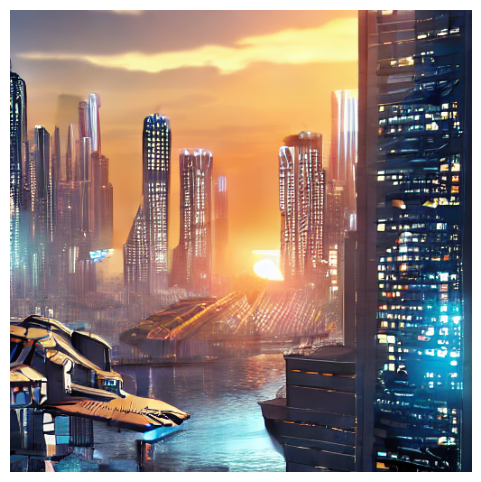

Saved as generated_image.png


In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

# Load model for CPU
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32
)
pipe = pipe.to("cpu")

# ==== YOUR TEXT INPUT ====
prompt = "a futuristic cityscape at sunset, cyberpunk style, highly detailed"
negative_prompt = "blurry, low quality, distorted"
# ==========================

# Generate image (CPU is slower; keep steps low)
result = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=15,
    guidance_scale=7.5,
    height=512,
    width=512
)

image = result.images[0]

image.save("generated_image.png")
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.show()

print("Saved as generated_image.png")
